# Reading in the historical data of the five main cryptocurrencies to be analyzed 

In [1]:
import pandas as pd
import numpy as np

In [2]:
DogecoinData = pd.read_csv("C:/Users/Administrator/OneDrive/Documents/DataScienceWork/DataScienceResearchData/CurrencyHistoryData/DogecoinHistoricalData.csv")

In [3]:
DogecoinData.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 02, 2021",0.271840,0.271789,0.280659,0.267469,2.64B,0.04%
1,"Nov 01, 2021",0.271736,0.279974,0.285830,0.263697,3.85B,-2.93%
2,"Oct 31, 2021",0.279928,0.268516,0.284980,0.252456,5.86B,4.25%
3,"Oct 30, 2021",0.268515,0.288094,0.294704,0.258190,5.08B,-6.78%
4,"Oct 29, 2021",0.288042,0.299655,0.306514,0.277888,7.56B,-3.87%


In [4]:
DogecoinData['Change Ratio'] = DogecoinData['Change %'].str.rstrip('%').astype('float') / 100.0

In [5]:
DogecoinData

,Date,Price,Open,High,Low,Vol.,Change %,Change Ratio
0,"Nov 02, 2021",0.271840,0.271789,0.280659,0.267469,2.64B,0.04%,0.0004
1,"Nov 01, 2021",0.271736,0.279974,0.285830,0.263697,3.85B,-2.93%,-0.0293
2,"Oct 31, 2021",0.279928,0.268516,0.284980,0.252456,5.86B,4.25%,0.0425
3,"Oct 30, 2021",0.268515,0.288094,0.294704,0.258190,5.08B,-6.78%,-0.0678
4,"Oct 29, 2021",0.288042,0.299655,0.306514,0.277888,7.56B,-3.87%,-0.0387
...,...,...,...,...,...,...,...,...
1609,"Jun 07, 2017",0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%,-0.1015
1610,"Jun 06, 2017",0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%,-0.0272
1611,"Jun 05, 2017",0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%,-0.0138
1612,"Jun 04, 2017",0.003770,0.003213,0.003770,0.002544,5.96M,17.34%,0.1734


In [6]:
DogecoinData.describe()

,Price,Open,High,Low,Change Ratio
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,0.041084,0.040917,0.044041,0.037797,0.044932
std,0.098494,0.098336,0.106291,0.089771,1.546289
min,0.000774,0.000774,0.000793,0.000669,-0.984300
25%,0.002376,0.002376,0.002460,0.002294,-0.026375
50%,0.002887,0.002887,0.003001,0.002770,-0.000550
75%,0.005630,0.005628,0.005853,0.005298,0.021925
max,0.686880,0.686914,0.738255,0.605162,61.915500


In [7]:
from scipy import stats

<AxesSubplot:xlabel='Change Ratio', ylabel='Price'>

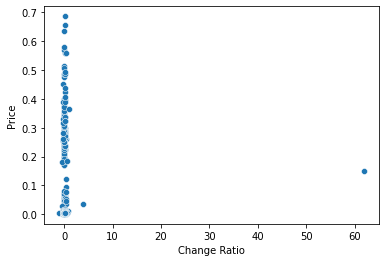

In [8]:
import seaborn as sns
sns.scatterplot(data= DogecoinData, x= "Change Ratio", y= "Price")

In [9]:
DogecoinData[DogecoinData['Change Ratio'] > 3]

,Date,Price,Open,High,Low,Vol.,Change %,Change Ratio
278,"Jan 28, 2021",0.036265,0.007415,0.037902,0.007415,12.41B,387.36%,3.8736
657,"Jan 15, 2020",0.148228,0.002356,0.180909,0.002328,2.21B,6191.55%,61.9155


<AxesSubplot:xlabel='Change Ratio', ylabel='Price'>

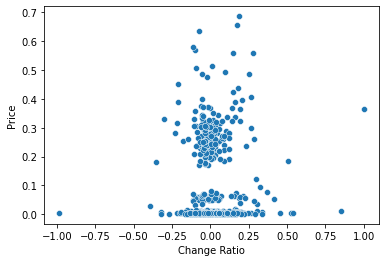

In [10]:
sns.scatterplot(data= DogecoinData[DogecoinData['Change Ratio'] < 2], x= "Change Ratio", y= "Price")

<AxesSubplot:xlabel='Change Ratio', ylabel='Price'>

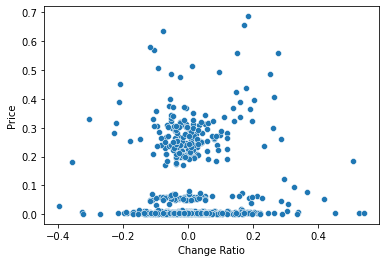

In [11]:
sns.scatterplot(data= DogecoinData[(DogecoinData['Change Ratio'] < 0.75) & (DogecoinData['Change Ratio'] > -0.75)], x= "Change Ratio", y= "Price")

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

from sklearn.model_selection import cross_val_score

from sklearn.utils import shuffle


In [13]:
DogecoinData_Clean = shuffle(DogecoinData[["Price", "Change Ratio"]].dropna())


In [14]:
DogecoinData_Clean

,Price,Change Ratio
122,0.246818,0.0092
814,0.002909,0.0368
1343,0.006070,-0.0411
153,0.423130,0.1465
1110,0.004597,0.0260
...,...,...
128,0.263852,0.0784
427,0.003242,0.0100
1403,0.007672,-0.1686
74,0.313874,-0.0068


In [15]:
x = pd.DataFrame(DogecoinData_Clean["Change Ratio"])
y = DogecoinData_Clean["Price"]
lm = LinearRegression()

In [16]:
cross_val_score(lm, x, y, cv=3)

array([ 7.70351662e-05, -1.47312269e-03, -6.13372384e-01])

<AxesSubplot:>

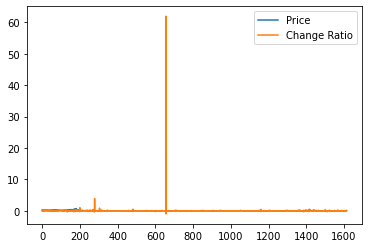

In [17]:
DogecoinData[["Price", "Change Ratio"]].plot(kind="line")

<AxesSubplot:>

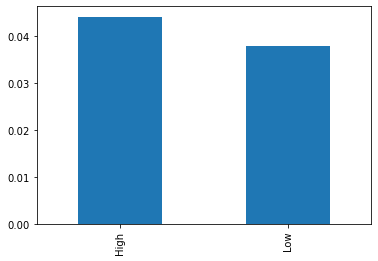

In [19]:
DogecoinData[["High", "Low"]].mean().plot(kind="bar")

In [20]:
stats.ttest_rel(DogecoinData.High, DogecoinData.Low)

Ttest_relResult(statistic=11.033131978274636, pvalue=2.4438699054662176e-27)

# Data Analysis on Litecoin Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score

from sklearn.utils import shuffle



In [22]:
LitecoinData = pd.read_csv("C:/Users/Administrator/OneDrive/Documents/DataScienceWork/DataScienceResearchData/CurrencyHistoryData/LitecoinHistoricalData.csv")

In [23]:
LitecoinData.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 25, 2021",226.251,224.941,231.097,220.927,208.06M,0.47%
1,"Apr 24, 2021",225.197,241.429,241.429,220.646,212.21M,-6.71%
2,"Apr 23, 2021",241.399,252.997,257.108,207.384,206.15M,-4.58%
3,"Apr 22, 2021",252.999,257.635,289.448,239.902,243.18M,-1.89%
4,"Apr 21, 2021",257.870,260.548,276.490,250.907,240.64M,-1.19%


In [24]:
LitecoinData.describe()

,Price,Open,High,Low
count,1706.000000,1706.000000,1706.000000,1706.000000
mean,73.323192,73.192575,76.574565,69.532658
std,61.187445,61.098851,64.848055,56.829347
min,3.500000,3.510000,3.580000,3.260000
25%,40.805000,40.758750,42.145000,39.560000
50%,56.007500,55.963000,57.836000,54.062000
75%,89.079250,88.987500,93.148000,84.977500
max,359.400000,359.400000,420.000000,324.670000


In [25]:
stats.ttest_rel(LitecoinData.High, LitecoinData.Low)

Ttest_relResult(statistic=25.04899682799332, pvalue=3.5900489612572737e-118)

<AxesSubplot:>

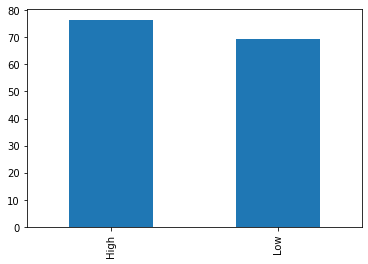

In [26]:
LitecoinData[["High", "Low"]].mean().plot(kind="bar")

In [27]:
LitecoinData['Change Ratio'] = LitecoinData['Change %'].str.rstrip('%').astype('float') / 100.0

In [28]:
LitecoinData_Clean = shuffle(LitecoinData[["Price", "Change Ratio"]].dropna())

In [29]:
LitecoinData_Clean

,Price,Change Ratio
610,73.274,-0.0281
903,54.573,0.0676
615,77.103,0.0106
115,124.162,-0.0452
1251,70.000,-0.0361
...,...,...
701,102.714,0.0246
947,60.934,0.0774
1386,48.760,-0.0490
1110,118.325,0.0350


In [73]:
x = pd.DataFrame(LitecoinData_Clean["Change Ratio"])
y = LitecoinData_Clean["Price"]
lm = LinearRegression()

In [76]:
cross_val_score(lm, x, y, cv=3)

array([0.00228854, 0.00067233, 0.00096543])

<AxesSubplot:xlabel='Change Ratio', ylabel='Price'>

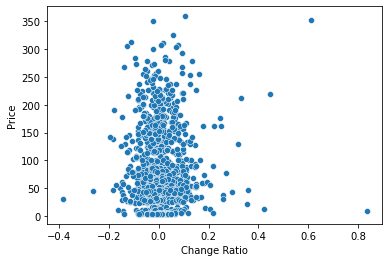

In [30]:
sns.scatterplot(data= LitecoinData, x= "Change Ratio", y= "Price")

In [31]:
LitecoinData[LitecoinData['Change Ratio'] < 3]

,Date,Price,Open,High,Low,Vol.,Change %,Change Ratio
0,"Apr 25, 2021",226.251,224.941,231.097,220.927,208.06M,0.47%,0.0047
1,"Apr 24, 2021",225.197,241.429,241.429,220.646,212.21M,-6.71%,-0.0671
2,"Apr 23, 2021",241.399,252.997,257.108,207.384,206.15M,-4.58%,-0.0458
3,"Apr 22, 2021",252.999,257.635,289.448,239.902,243.18M,-1.89%,-0.0189
4,"Apr 21, 2021",257.870,260.548,276.490,250.907,240.64M,-1.19%,-0.0119
...,...,...,...,...,...,...,...,...
1701,"Aug 28, 2016",3.720,3.780,3.780,3.620,8.19K,-1.59%,-0.0159
1702,"Aug 27, 2016",3.780,3.810,3.850,3.620,4.91K,-0.79%,-0.0079
1703,"Aug 26, 2016",3.810,3.810,3.900,3.770,14.35K,0.00%,0.0000
1704,"Aug 25, 2016",3.810,3.840,3.880,3.750,21.87K,-0.78%,-0.0078


<AxesSubplot:>

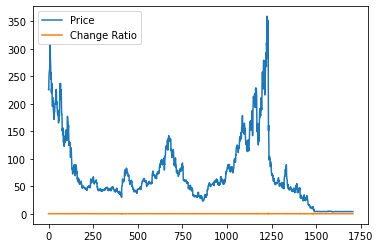

In [32]:
LitecoinData[["Price", "Change Ratio"]].plot(kind="line")

# Data Analysis on Bitcoin Data

In [33]:
BitcoinData = pd.read_csv("C:/Users/Administrator/OneDrive/Documents/DataScienceWork/DataScienceResearchData/CurrencyHistoryData/BitcoinHistoricalData.csv")

In [34]:
BitcoinData.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 02, 2021","63,439.90","60,912.20","64,256.40","60,651.50",62.71K,4.14%
1,"Nov 01, 2021","60,915.30","61,310.10","62,430.10","59,612.70",61.21K,-0.64%
2,"Oct 31, 2021","61,309.60","61,842.20","62,393.70","60,005.70",50.06K,-0.86%
3,"Oct 30, 2021","61,840.10","62,245.00","62,338.50","60,786.00",40.51K,-0.65%
4,"Oct 29, 2021","62,242.80","60,579.90","62,952.20","60,322.20",63.39K,2.74%


In [35]:
BitcoinData['Price'] = BitcoinData['Price'].str.replace(',','').astype(float)
BitcoinData['Open'] = BitcoinData['Open'].str.replace(',','').astype(float)
BitcoinData['High'] = BitcoinData['High'].str.replace(',','').astype(float)
BitcoinData['Low'] = BitcoinData['Low'].str.replace(',','').astype(float)

In [36]:
BitcoinData.describe()

,Price,Open,High,Low
count,4126.000000,4126.000000,4126.000000,4126.000000
mean,6210.315511,6194.992341,6381.345250,5993.270044
std,12325.115891,12293.352089,12669.887138,11886.194840
min,0.100000,0.000000,0.100000,0.000000
25%,101.950000,101.750000,105.825000,96.050000
50%,606.000000,605.700000,612.500000,594.050000
75%,7394.675000,7388.100000,7572.775000,7226.200000
max,65979.100000,66004.600000,66967.100000,63543.700000


In [37]:
stats.ttest_rel(BitcoinData.High, BitcoinData.Low)

Ttest_relResult(statistic=26.36975605513725, pvalue=9.413511196238074e-142)

<AxesSubplot:>

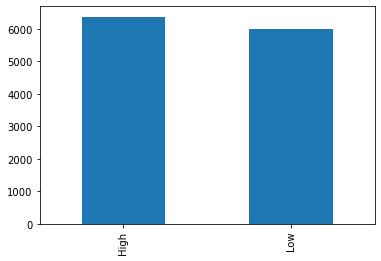

In [38]:
BitcoinData[["High", "Low"]].mean().plot(kind="bar")

In [40]:
BitcoinData['Change Ratio'] = BitcoinData['Change %'].str.rstrip('%').astype('float') / 100.0

In [41]:
BitcoinData_Clean = shuffle(BitcoinData[["Price", "Change Ratio"]].dropna())

In [42]:
BitcoinData_Clean

,Price,Change Ratio
2614,484.5,0.0017
3689,4.9,0.0103
357,15303.6,-0.0015
2703,644.3,-0.0103
1602,2467.3,-0.0906
...,...,...
4002,0.3,0.0000
942,5010.2,0.0220
2467,218.5,-0.0575
3920,0.9,0.0000


In [77]:
x = pd.DataFrame(BitcoinData_Clean["Change Ratio"])
y = BitcoinData_Clean["Price"]
lm = LinearRegression()

In [78]:
cross_val_score(lm, x, y, cv=3)

array([-0.00163722, -0.00425168, -0.00102368])

<AxesSubplot:xlabel='Change Ratio', ylabel='Price'>

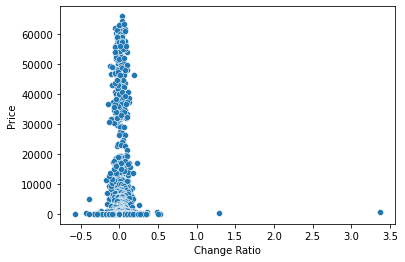

In [43]:
sns.scatterplot(data= BitcoinData, x= "Change Ratio", y= "Price")

In [44]:
BitcoinData[BitcoinData['Change Ratio'] > 3]

,Date,Price,Open,High,Low,Vol.,Change %,Change Ratio
2806,"Feb 26, 2014",593.1,135.8,650.0,522.8,0.60K,336.84%,3.3684


In [45]:
BitcoinData[BitcoinData['Change Ratio'] < 3]

,Date,Price,Open,High,Low,Vol.,Change %,Change Ratio
0,"Nov 02, 2021",63439.9,60912.2,64256.4,60651.5,62.71K,4.14%,0.0414
1,"Nov 01, 2021",60915.3,61310.1,62430.1,59612.7,61.21K,-0.64%,-0.0064
2,"Oct 31, 2021",61309.6,61842.2,62393.7,60005.7,50.06K,-0.86%,-0.0086
3,"Oct 30, 2021",61840.1,62245.0,62338.5,60786.0,40.51K,-0.65%,-0.0065
4,"Oct 29, 2021",62242.8,60579.9,62952.2,60322.2,63.39K,2.74%,0.0274
...,...,...,...,...,...,...,...,...
4121,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%,0.0000
4122,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%,0.0000
4123,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%,0.0000
4124,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%,0.0000


<AxesSubplot:>

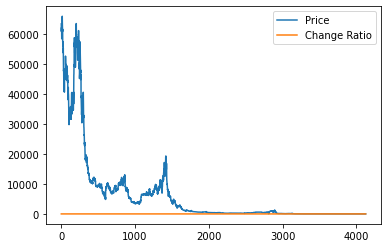

In [46]:
BitcoinData[["Price", "Change Ratio"]].plot(kind="line")

# Data Analysis on Shiba Inu Currency Data

In [47]:
SHIBAINUData = pd.read_csv("C:/Users/Administrator/OneDrive/Documents/DataScienceWork/DataScienceResearchData/CurrencyHistoryData/SHIBA_INUHistoricalData.csv")

In [48]:
SHIBAINUData.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 02, 2021",0.000068,0.000072,0.000072,0.000067,"18,216.03B",-5.02%
1,"Nov 01, 2021",0.000072,0.000067,0.000075,0.000066,"35,022.84B",6.85%
2,"Oct 31, 2021",0.000067,0.000065,0.000069,0.000059,"38,337.18B",2.35%
3,"Oct 30, 2021",0.000065,0.000075,0.000078,0.000062,"39,238.64B",-12.60%
4,"Oct 29, 2021",0.000075,0.000069,0.000077,0.000061,"68,132.09B",8.67%


In [49]:
SHIBAINUData.describe()

,Price,Open,High,Low
count,175.000000,175.000000,175.000000,175.000000
mean,0.000013,0.000013,0.000014,0.000012
std,0.000014,0.000014,0.000016,0.000012
min,0.000006,0.000006,0.000006,0.000005
25%,0.000007,0.000007,0.000007,0.000007
50%,0.000008,0.000008,0.000008,0.000007
75%,0.000009,0.000009,0.000010,0.000009
max,0.000079,0.000079,0.000088,0.000067


In [50]:
stats.ttest_rel(SHIBAINUData.High, SHIBAINUData.Low)

Ttest_relResult(statistic=6.498825248253134, pvalue=8.228177470196453e-10)

<AxesSubplot:>

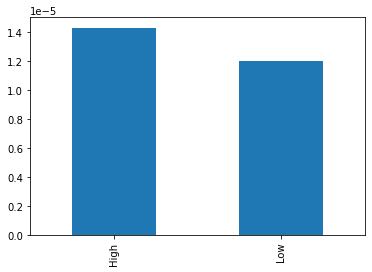

In [51]:
SHIBAINUData[["High", "Low"]].mean().plot(kind="bar")

In [52]:
SHIBAINUData['Change Ratio'] = SHIBAINUData['Change %'].str.rstrip('%').astype('float') / 100.0

In [53]:
SHIBAINUData_Clean = shuffle(SHIBAINUData[["Price", "Change Ratio"]].dropna())

In [54]:
SHIBAINUData_Clean

,Price,Change Ratio
50,0.000006,-0.0580
72,0.000008,0.0086
40,0.000008,0.0524
37,0.000007,-0.0287
48,0.000007,0.0165
...,...,...
22,0.000031,0.1712
110,0.000007,-0.0456
142,0.000007,0.0925
45,0.000008,-0.0711


In [79]:
x = pd.DataFrame(SHIBAINUData_Clean["Change Ratio"])
y = SHIBAINUData_Clean["Price"]
lm = LinearRegression()

In [80]:
cross_val_score(lm, x, y, cv=3)

array([ 0.07704208, -0.0568117 ,  0.02204291])

<AxesSubplot:xlabel='Change Ratio', ylabel='Price'>

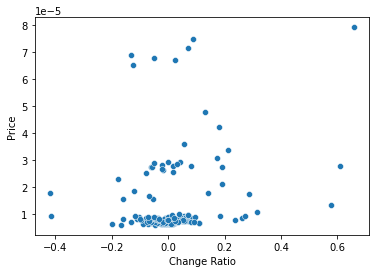

In [55]:
sns.scatterplot(data= SHIBAINUData, x= "Change Ratio", y= "Price")

In [57]:
SHIBAINUData[SHIBAINUData['Change Ratio'] < 3]

,Date,Price,Open,High,Low,Vol.,Change %,Change Ratio
0,"Nov 02, 2021",0.000068,0.000072,0.000072,0.000067,"18,216.03B",-5.02%,-0.0502
1,"Nov 01, 2021",0.000072,0.000067,0.000075,0.000066,"35,022.84B",6.85%,0.0685
2,"Oct 31, 2021",0.000067,0.000065,0.000069,0.000059,"38,337.18B",2.35%,0.0235
3,"Oct 30, 2021",0.000065,0.000075,0.000078,0.000062,"39,238.64B",-12.60%,-0.1260
4,"Oct 29, 2021",0.000075,0.000069,0.000077,0.000061,"68,132.09B",8.67%,0.0867
...,...,...,...,...,...,...,...,...
170,"May 16, 2021",0.000018,0.000016,0.000018,0.000013,"61,614.36B",14.23%,0.1423
171,"May 15, 2021",0.000016,0.000018,0.000018,0.000015,"43,724.10B",-15.87%,-0.1587
172,"May 14, 2021",0.000018,0.000021,0.000021,0.000018,"40,929.23B",-12.14%,-0.1214
173,"May 13, 2021",0.000021,0.000018,0.000021,0.000016,"91,382.21B",18.97%,0.1897


<AxesSubplot:>

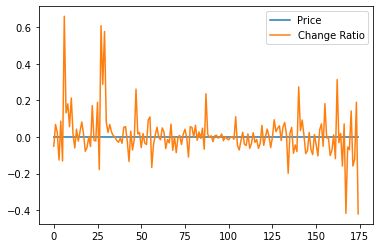

In [58]:
SHIBAINUData[["Price", "Change Ratio"]].plot(kind="line")

# Data Analysis for Ethereum coin Data

In [59]:
EthereumData = pd.read_csv("C:/Users/Administrator/OneDrive/Documents/DataScienceWork/DataScienceResearchData/CurrencyHistoryData/EthereumHistoricalData.csv")

In [60]:
EthereumData.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 02, 2021","4,483.87","4,320.85","4,518.16","4,287.36",565.69K,3.77%
1,"Nov 01, 2021","4,320.85","4,287.41","4,376.94","4,157.51",574.26K,0.78%
2,"Oct 31, 2021","4,287.56","4,322.00","4,393.61","4,169.48",555.32K,-0.77%
3,"Oct 30, 2021","4,320.65","4,413.70","4,428.41","4,250.24",494.87K,-2.11%
4,"Oct 29, 2021","4,413.70","4,284.90","4,458.30","4,268.21",781.57K,3.01%


In [61]:
EthereumData['Price'] = EthereumData['Price'].str.replace(',','').astype(float)
EthereumData['Open'] = EthereumData['Open'].str.replace(',','').astype(float)
EthereumData['High'] = EthereumData['High'].str.replace(',','').astype(float)
EthereumData['Low'] = EthereumData['Low'].str.replace(',','').astype(float)

In [62]:
EthereumData.describe()

,Price,Open,High,Low
count,2064.000000,2064.000000,2064.000000,2064.000000
mean,582.291686,580.147500,603.327834,554.865688
std,890.627868,886.597566,921.618195,849.749958
min,6.700000,6.680000,7.320000,5.860000
25%,125.960000,125.842500,131.697500,121.027500
50%,229.130000,228.980000,236.560000,223.040000
75%,502.687500,500.525000,525.462500,484.000000
max,4483.870000,4413.700000,4518.160000,4287.360000


In [63]:
stats.ttest_rel(EthereumData.High, EthereumData.Low)

Ttest_relResult(statistic=24.03069008945808, pvalue=1.0352176456997861e-112)

<AxesSubplot:>

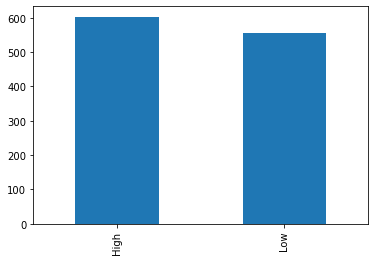

In [64]:
EthereumData[["High", "Low"]].mean().plot(kind="bar")

In [65]:
EthereumData['Change Ratio'] = EthereumData['Change %'].str.rstrip('%').astype('float') / 100.0

In [66]:
EthereumData_Clean = shuffle(EthereumData[["Price", "Change Ratio"]].dropna())

In [67]:
EthereumData_Clean

,Price,Change Ratio
912,163.03,-0.0039
1704,18.50,-0.0508
1633,90.37,0.0052
1067,118.23,0.0391
123,2154.78,0.0217
...,...,...
1853,12.84,-0.0206
1743,10.50,-0.0251
507,238.22,0.0029
1754,9.67,-0.0163


In [81]:
x = pd.DataFrame(EthereumData_Clean["Change Ratio"])
y = EthereumData_Clean["Price"]
lm = LinearRegression()

In [82]:
cross_val_score(lm, x, y, cv=3)

array([-0.00071488, -0.00463299, -0.00136005])

<AxesSubplot:xlabel='Change Ratio', ylabel='Price'>

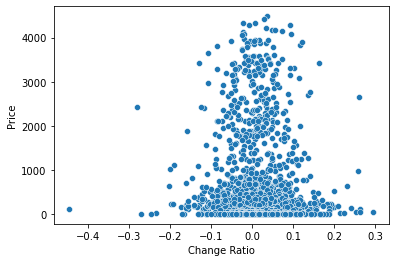

In [68]:
sns.scatterplot(data= EthereumData, x= "Change Ratio", y= "Price")

In [70]:
EthereumData[EthereumData['Change Ratio'] < 3]

,Date,Price,Open,High,Low,Vol.,Change %,Change Ratio
0,"Nov 02, 2021",4483.87,4320.85,4518.16,4287.36,565.69K,3.77%,0.0377
1,"Nov 01, 2021",4320.85,4287.41,4376.94,4157.51,574.26K,0.78%,0.0078
2,"Oct 31, 2021",4287.56,4322.00,4393.61,4169.48,555.32K,-0.77%,-0.0077
3,"Oct 30, 2021",4320.65,4413.70,4428.41,4250.24,494.87K,-2.11%,-0.0211
4,"Oct 29, 2021",4413.70,4284.90,4458.30,4268.21,781.57K,3.01%,0.0301
...,...,...,...,...,...,...,...,...
2059,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05%,-0.1705
2060,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%,0.1664
2061,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%,0.0812
2062,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%,0.0170


<AxesSubplot:>

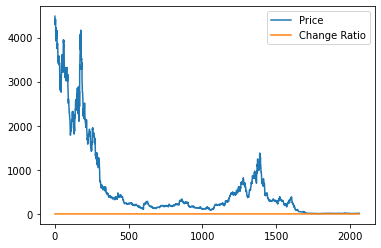

In [71]:
EthereumData[["Price", "Change Ratio"]].plot(kind="line")